In [10]:
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams["font.sans-serif"]=["SimHei"]
mpl.rcParams["axes.unicode_minus"]=False
from selenium import webdriver
from  time import sleep
import pandas as pd
import json
from  random import random
import re

In [11]:
df = pd.read_csv('./text.csv')

In [12]:
del df['Unnamed: 0']

In [13]:
df

,url,raw,text,sdict,scount
0,https://mp.weixin.qq.com/s/HTsNM1zxEAx3IqoF1uYnYA,"<!DOCTYPE html>\n<html class=""\n\n"">\n <hea...",\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"{1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: ...",[ 0 0 0 0 0 0 0 0 0 ...
1,http://hc.nc.gov.cn/ncwjw/gzdt/202002/b5cf8972...,"<!DOCTYPE html>\r\n<html lang=""en"">\r\n<head>\...",\n\n\n\n南昌市卫生健康委员会\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"{1: '', 2: '', 3: '', 4: '', 5: '南昌市卫生健康委员会', ...",[ 0 0 0 0 10 0 0 0 0 0 0 ...
2,http://m.ha.bendibao.com/mip/1636.shtm,<!DOCTYPE html>\r\n<html mip>\r\n<head>\r\n\t<...,\n\n\n\n\n淮安经济技术开发区肺炎疫情+确诊人数（持续更新）- 淮安本地宝\n\n\...,"{1: '', 2: '', 3: '', 4: '', 5: '', 6: '淮安经济技术...",[ 0 0 0 0 0 31 0 0 0 0 0 ...
3,http://news.gxnews.com.cn/staticpages/20200209...,<!DOCTYPE html>\n<html>\n<head>\n<meta charset...,\n\n\n\n\n2月8日广西新增确诊病例12例 新增死亡病例1例-广西新闻网\n\n\n...,"{1: '', 2: '', 3: '', 4: '', 5: '', 6: '2月8日广西...",[ 0 0 0 0 0 30 0 0 0 ...
4,http://o.xiancity.cn/system/2020/02/09/0307133...,"<html><head>\r\n\n <meta http-equiv=""Conten...",\n\n\n\n\n\n周至县疫情防控指挥部今日发布寻人通告-原创频道-西安网\n\n\n\...,"{1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: ...",[ 0 0 0 0 0 0 27 0 0 0 0 ...
...,...,...,...,...,...
188,https://weibo.com/7129811001/ItKAzr93p?from=pa...,"<html><head>\n<meta charset=""utf-8"">\n<meta co...",\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"{1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: ...",[ 0 0 0 0 0 0 0 0 0 0 0 ...
189,https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...,403,NaN,NaN,NaN
190,https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...,403,NaN,NaN,NaN
191,https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...,403,NaN,NaN,NaN


In [46]:
for sc in df['scount']:
    print(pd.array(sc))
    break

ValueError: Cannot pass scalar '[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0   20   20   20   29   16    0    0    0   50    0    0    4
    0    0    3   11    0    0    4   95    0    0    0    0    0    0
    0    0    0    0    0    0    0 4493    0    0    0    0    0    0
    0    0    0    0    0    2    0    0    0    0    0    0    0    0
    2    0    0    0    0    0    0    0    0    0   13    0    0    0
    0   20    0    0    0    0    5    0    0    0    0    0    0    0
    8    0   41    0    4    0    0    0    0    0    0    0    3    0
    0    0    0    0    0    0    0   26    0    0    8    0    2    0
    0    0    0   51   18    0    0    0    0   11    0    0    0    0
    0    0    0    0    3    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    4    0    0    0    0
    4    0    0    0    8    0    0    0    0    4    0    0    0    8
    0    0    0    0    4    0    0    0    0   12    0    0    0    0
    0    0    0    0    0    0    0   11    0    0    0    0    0    0
    0    0    0   23    0    0    0    0    0    0    0    0    0    0
    2    2    0    0    0    0    0    0    0    0    0    0    0    2
    2    0    0    0    0    0    0    0    6    0   22    0    4    4
    0    0    0    0    0    0    8    0    2    2    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    3    0    0    0
    0    0    0    9    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]' to 'pandas.array'.

In [14]:
df.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [16]:
len(df['scount'])

193

In [20]:
count_dict = {}
for i in range(len(df['scount'])):
    data_name = 'data_'+str(i)
    count_dict[data_name] = df['scount'][i]


In [21]:
count_dict['data_0']

'[   0    0    0    0    0    0    0    0    0    0    0    0    0    0\n    0    0    0    0    0    0    0    0    0    0    0    0    0    0\n    0    0    0    0    0    0    0    0    0    0    0    0    0    0\n    0    0    0    0    0    0    0    0    0    0    0    0    0    0\n    0    0   20   20   20   29   16    0    0    0   50    0    0    4\n    0    0    3   11    0    0    4   95    0    0    0    0    0    0\n    0    0    0    0    0    0    0 4493    0    0    0    0    0    0\n    0    0    0    0    0    2    0    0    0    0    0    0    0    0\n    2    0    0    0    0    0    0    0    0    0   13    0    0    0\n    0   20    0    0    0    0    5    0    0    0    0    0    0    0\n    8    0   41    0    4    0    0    0    0    0    0    0    3    0\n    0    0    0    0    0    0    0   26    0    0    8    0    2    0\n    0    0    0   51   18    0    0    0    0   11    0    0    0    0\n    0    0    0    0    3    0    0    0    0    0    0    0   

In [26]:
data = pd.DataFrame(data=count_dict,index = [0])

In [27]:
data

,data_0,data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,...,data_183,data_184,data_185,data_186,data_187,data_188,data_189,data_190,data_191,data_192
0,[ 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 10 0 0 0 0 0 0 ...,[ 0 0 0 0 0 31 0 0 0 0 0 ...,[ 0 0 0 0 0 30 0 0 0 ...,[ 0 0 0 0 0 0 27 0 0 0 0 ...,[ 0 0 0 0 34 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 ...,[ 32 0 0 3 0 41 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 ...,...,[ 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 0 0 ...,NaN,NaN,NaN,[ 0 0 0 0 0 0 0 0 0 ...


In [32]:
data_f = data.dropna(axis=1, how='all')

In [33]:
data_f

,data_0,data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,...,data_180,data_181,data_182,data_183,data_184,data_185,data_186,data_187,data_188,data_192
0,[ 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 10 0 0 0 0 0 0 ...,[ 0 0 0 0 0 31 0 0 0 0 0 ...,[ 0 0 0 0 0 30 0 0 0 ...,[ 0 0 0 0 0 0 27 0 0 0 0 ...,[ 0 0 0 0 34 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 ...,[ 32 0 0 3 0 41 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 ...,...,[ 0 0 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 ...


In [36]:
# # describe data
# data_f.describe()

# # boxplot data
# data_f.boxplot()

,data_0,data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,...,data_180,data_181,data_182,data_183,data_184,data_185,data_186,data_187,data_188,data_192
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,[ 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 10 0 0 0 0 0 0 ...,[ 0 0 0 0 0 31 0 0 0 0 0 ...,[ 0 0 0 0 0 30 0 0 0 ...,[ 0 0 0 0 0 0 27 0 0 0 0 ...,[ 0 0 0 0 34 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 ...,[ 32 0 0 3 0 41 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 ...,...,[ 0 0 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 0 0 ...,[ 0 0 0 0 0 0 0 0 0 ...
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


TypeError: unsupported operand type(s) for /: 'str' and 'int'

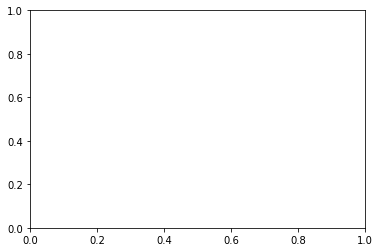

In [38]:
 #用matplotlib来画出箱型图
plt.boxplot(x=data_f['data_0'],whis=1.5)
plt.show()